## Fully Connected Autoencoder

* Input  784-latent dimension of your choice - Output 784
* Just one hidden layer
* Sigmoid function after Output layer.
* Building this is just like MLP
* What is the effect of decreasing the size of latent dimension ?


## Download the dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.nn.functional as F


import torch.optim as optim
import numpy as np

from tqdm.autonotebook import tqdm
from itertools import chain

batch_size = 256
image_dim=784


# dataset construction
transform = transforms.Compose([
    transforms.ToTensor(), # convert to tensor
    transforms.Lambda(lambda x: x.view(image_dim)) # flatten into vector
    ])

train_set = torchvision.datasets.MNIST(
    root='./data/MNIST'
    ,train=True
    ,download=True
    ,transform=transform
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)

C:\Users\lawre\AppData\Local\Temp\ipykernel_8508\2237961737.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


100%|██████████| 9912422/9912422 [00:05<00:00, 1924753.77it/s] 


Extracting ./data/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28876208.30it/s]


Extracting ./data/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 112534030.80it/s]


Extracting ./data/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



## Define the Fully Connected Autoencoder model

In [2]:
class Autoencoder(nn.Module):  #output size =  input size
  def __init__(self,image_dim,latent_dim):
    super(Autoencoder,self).__init__()
    self.layer_encode = nn.Linear(image_dim,latent_dim)
    self.layer_decode = nn.Linear(latent_dim,image_dim)

  def forward(self,x):

    encode = self.layer_encode(x)
    decode = self.layer_decode(encode)
    decode = torch.sigmoid(decode)

    return decode

## Training 

In [24]:
def trainingAutoencoder(data_loader,model,epochSize):
  
  model.train()  
  optimizer = optim.Adam(model.parameters(), lr=1e-3)

  # training loop
  for epoch in range(epochSize):
      losses = []
      trainloader = tqdm(data_loader)

      for i, data in enumerate(trainloader, 0):

          inputs, _ = data

          optimizer.zero_grad()

          outputs =  model(inputs)

          loss = F.binary_cross_entropy(outputs, inputs, reduction='sum') / inputs.shape[0]
          loss.backward()
          optimizer.step()

          losses.append(loss.item())
          trainloader.set_postfix(loss=np.mean(losses), epoch=epoch)
  
  # calculate average training loss over all batches
  print("Average training loss: ", np.mean(losses))
  
  return inputs, outputs
    
model =  Autoencoder(784,8)    
inputs, decoded_output = trainingAutoencoder(train_loader,model,10)

## Original image

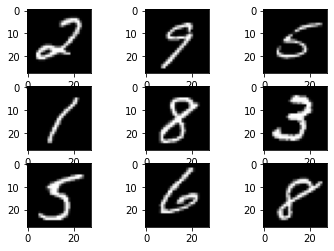

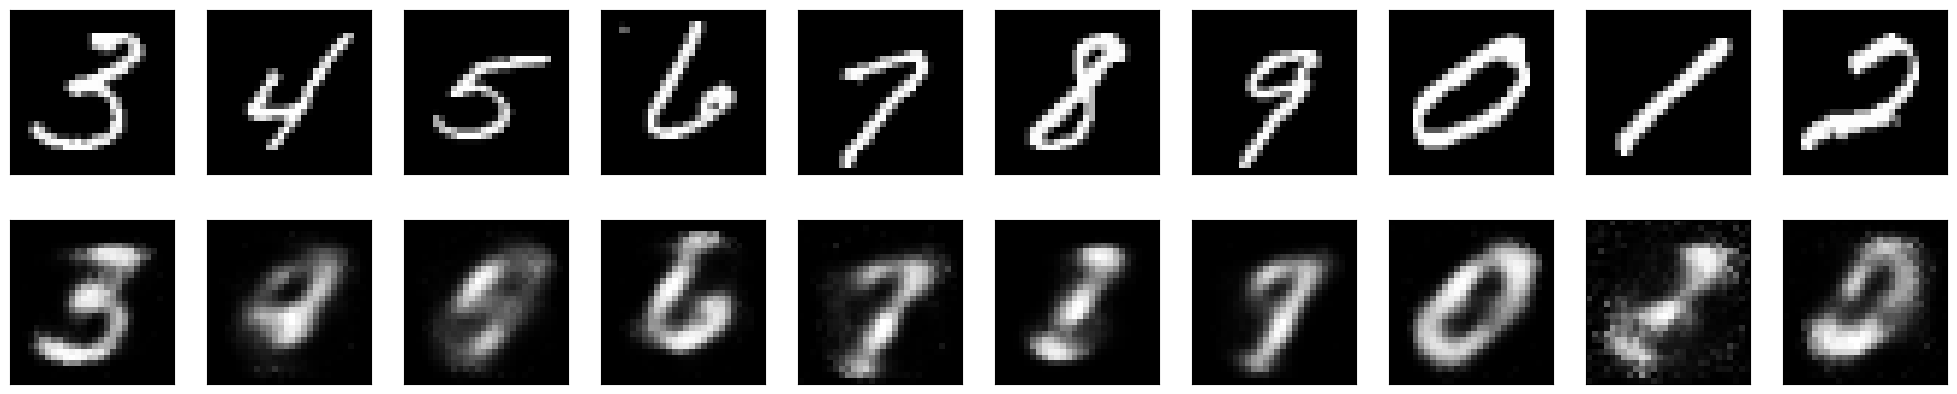

In [22]:
#Your code here. Sample of original image given above
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(inputs, outputs):
    inputs = inputs.view(-1, 28, 28).detach().numpy()
    outputs = outputs.view(-1, 28, 28).detach().numpy()

    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,5))

    # input images on top row, reconstructions on bottom
    for images, row in zip([inputs, outputs], axes):
        for img, ax in zip(images, row):
            ax.imshow(img, cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
visualize(inputs, decoded_output)

## Reconstructed image

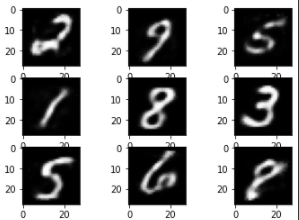

## Task: Compare the reconstruced images for latent dimension of 32,16 and 8.

Latent dimension: 32


100%|██████████| 235/235 [00:16<00:00, 14.37it/s, epoch=4, loss=102]


Average training loss:  102.02233984115276
Latent dimension: 16


100%|██████████| 235/235 [00:13<00:00, 17.49it/s, epoch=4, loss=130]


Average training loss:  130.03893422877536
Latent dimension: 8


100%|██████████| 235/235 [00:12<00:00, 18.12it/s, epoch=4, loss=162]


Average training loss:  162.15055977030002


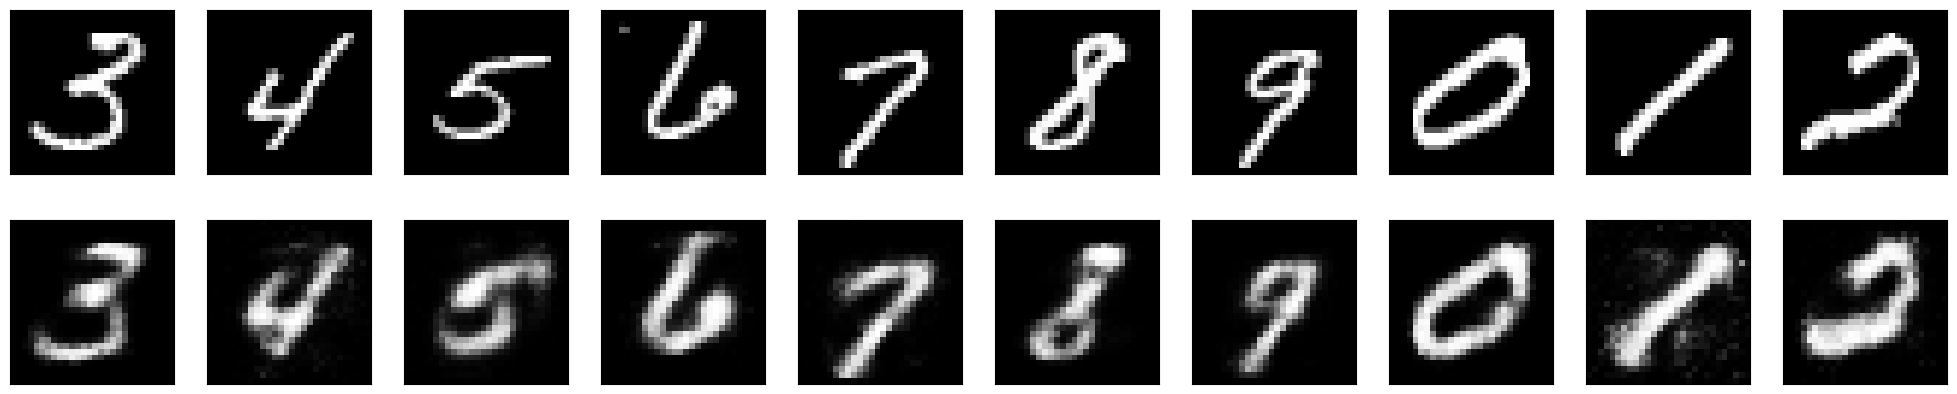

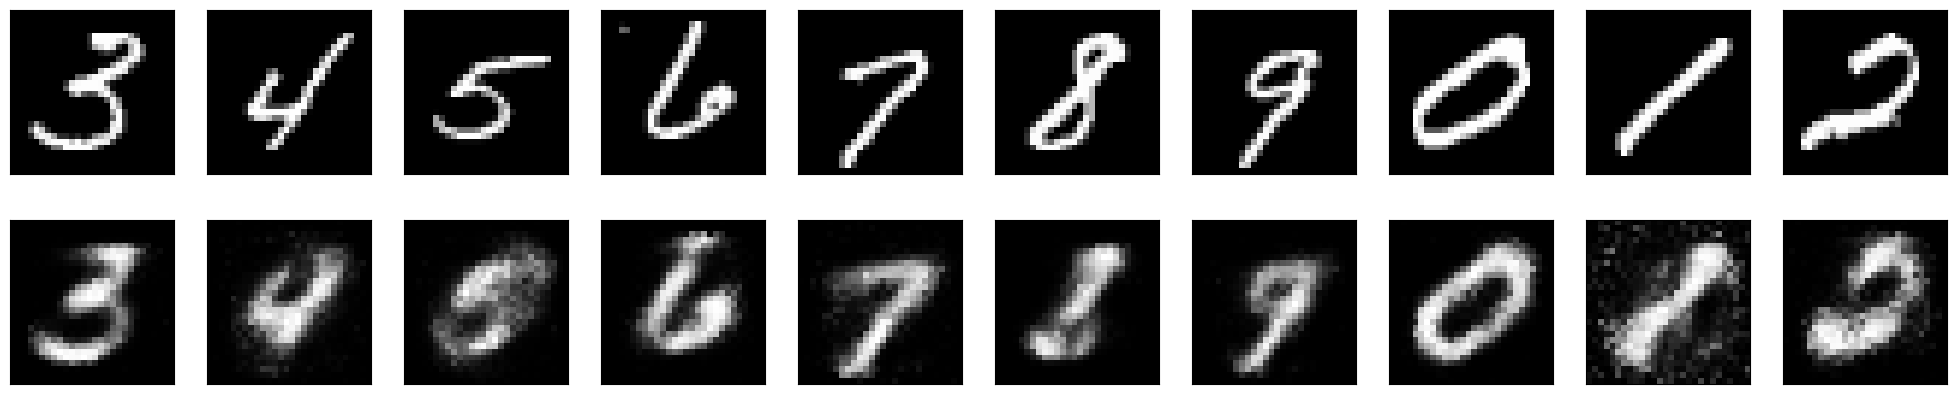

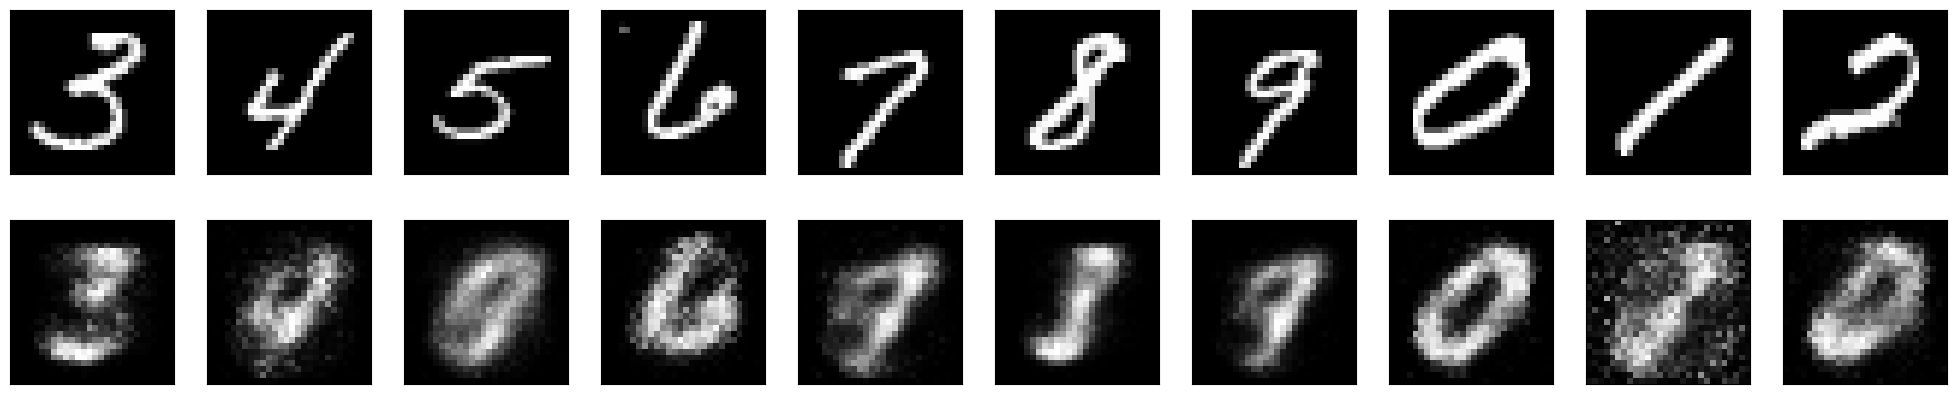

In [25]:
for size in [32, 16, 8]:
    print(f'Latent dimension: {size}')
    model =  Autoencoder(784, size)    
    inputs, decoded_output = trainingAutoencoder(train_loader,model,5) #5 epochs will do to save time
    visualize(inputs, decoded_output)

## Evaluate model on training set?